<h1><center>Exploratory Data Analysis of San Francisco's Building Permits</center></h1>
<h2>Introduction</h2>
<p>The goal of this report is to create visualizations from the dataset, get a better sense of the data, identify trends and correlations, and hopefully, form new and interesting questions that can uncover new insights. I will be using plotting tools from matplotlib and seaborn to accomplish this task. My hope, is that I can get a clear picture of San Francisco's real estate development.</p> 

In [88]:
import datetime as dt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 

In [89]:
df = pd.read_csv(filepath_or_buffer='Building_Permits_Cleaned.csv',
                 header=0, low_memory=False, index_col='Unnamed: 0')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198900 entries, 0 to 198899
Data columns (total 42 columns):
permit_type                               198900 non-null int64
permit_type_definition                    198900 non-null object
permit_creation_date                      198900 non-null object
block                                     198900 non-null object
lot                                       198900 non-null object
street_number                             198900 non-null int64
street_name                               198900 non-null object
unit                                      198900 non-null object
description                               198900 non-null object
current_status                            198900 non-null object
current_status_date                       198900 non-null object
filed_date                                198900 non-null object
issued_date                               183960 non-null object
completed_date                            9719

### Converting appropriate columns

In [90]:
def to_category(columns, dataframe):
    """Convert a list of columns, from a dataframe, to a category datatype"""
    for column in columns: 
        dataframe[column] = dataframe[column].astype('category')

def to_integer(columns, dataframe):
    """Convert columns from a dataframe to an int64 datatype"""
    for column in columns: 
        dataframe[column] = dataframe[column].astype('int64')

In [91]:
cols = ['permit_creation_date', 'current_status_date','filed_date',
        'issued_date', 'completed_date', 'first_construction_document_date',
        'permit_expiration_date']

for col in cols:
    df[col] = pd.to_datetime(df[col])

In [92]:
columns = ['permit_type_definition', 'current_status', 'fire_only_permit', 
           'existing_use', 'proposed_use', 'existing_construction_type', 'proposed_construction_type',
           'existing_construction_type_description', 'proposed_construction_type_description', 
           'tidf_compliance', 'site_permit', 'neighborhoods', 'zipcode',
           'time_frame']
to_category(columns=columns, dataframe=df)

## EDA 
### Can we count something interesting?
Let's take a look at how many permits we have for each category

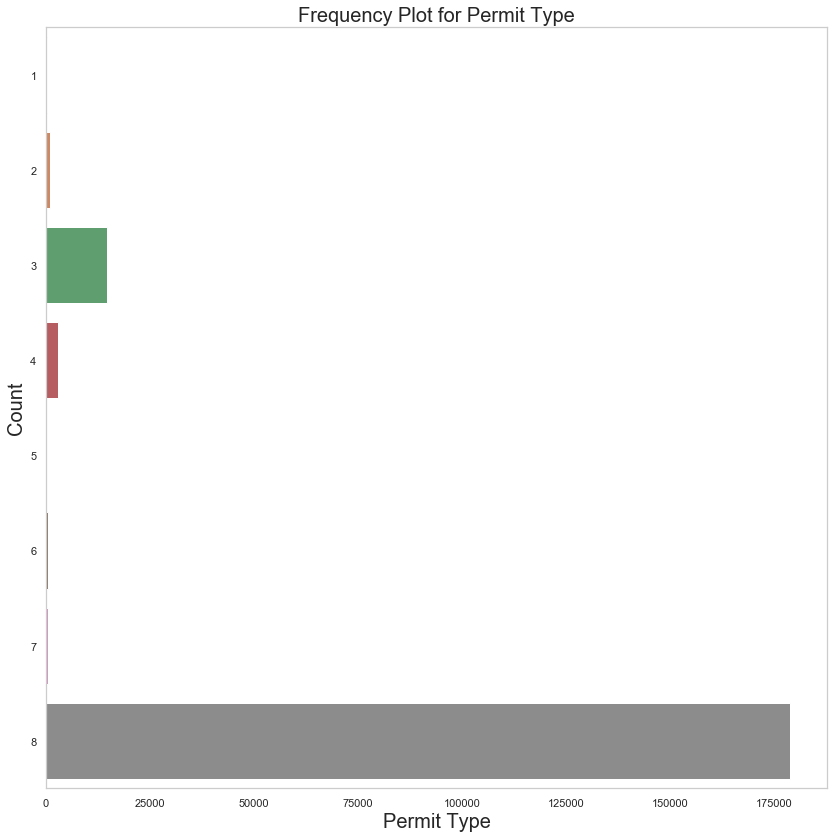

In [93]:
dic = dict(df.permit_type.value_counts(sort=False))
permit = list(dic.keys())
value = list(dic.values())

sb.set(style='whitegrid')
plt.figure(figsize=(14,14))
_ = sb.barplot(x=value, y=permit, orient="h")
_ = plt.grid(False)
_ = plt.xlabel('Permit Type', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Frequency Plot for Permit Type', fontsize=20)
plt.show()

From the graph we see that a majority of permits filed were of permit type 8, which is an otc alterations permit. A distant second is of permit type 3, which is an additions alterations or repairs permit.  
  
Let's look at how many of these permits were filed in each neighborhood, zip code, and time frame.

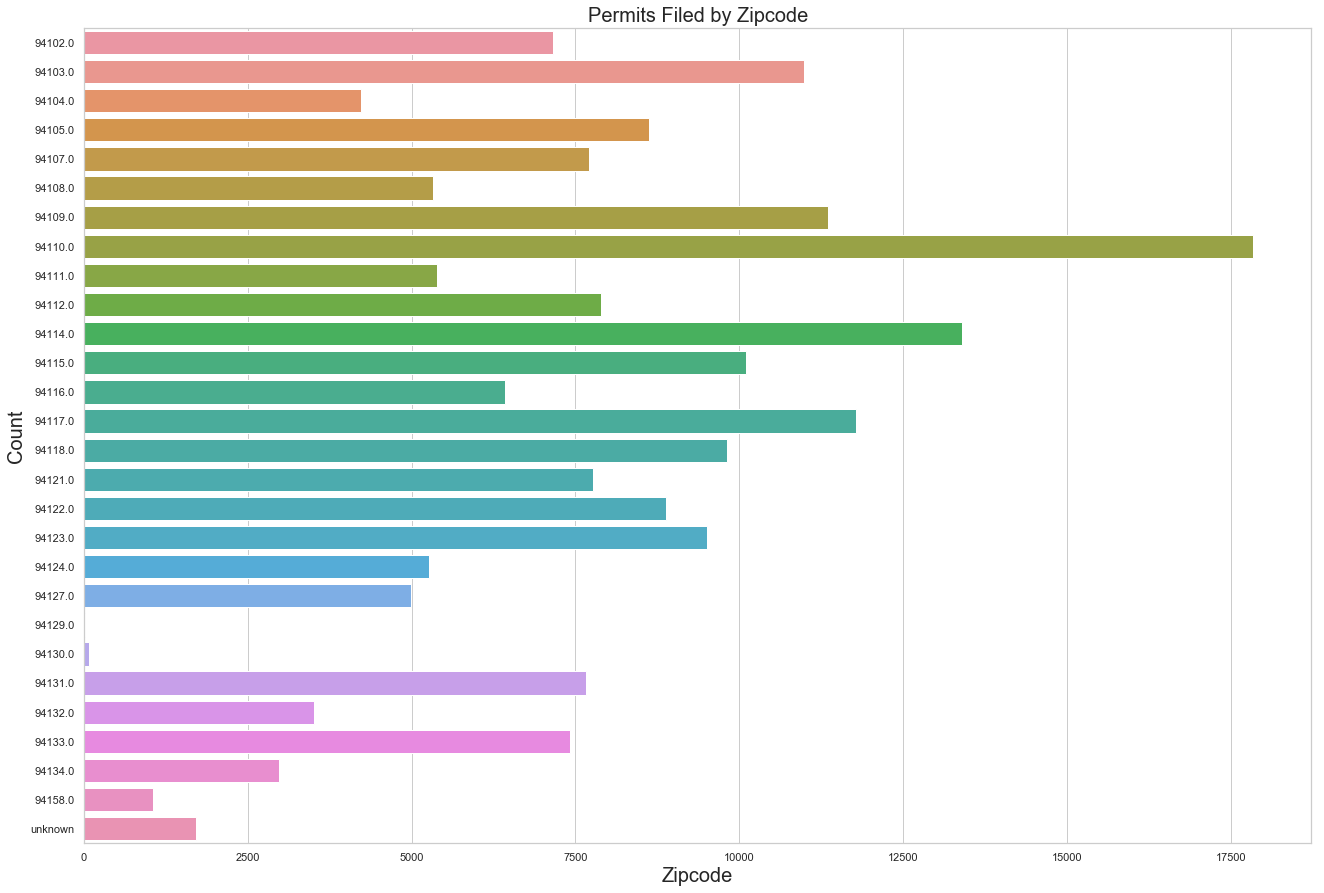

In [94]:
dic = dict(df.zipcode.value_counts(sort = False))

zipcode = list(dic.keys())
value = list(dic.values())

plt.figure(figsize=(22, 15))
_ = sb.barplot(x=value, y=zipcode, orient="h")
_ = plt.xlabel('Zipcode', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Zipcode', fontsize=20)
plt.show()

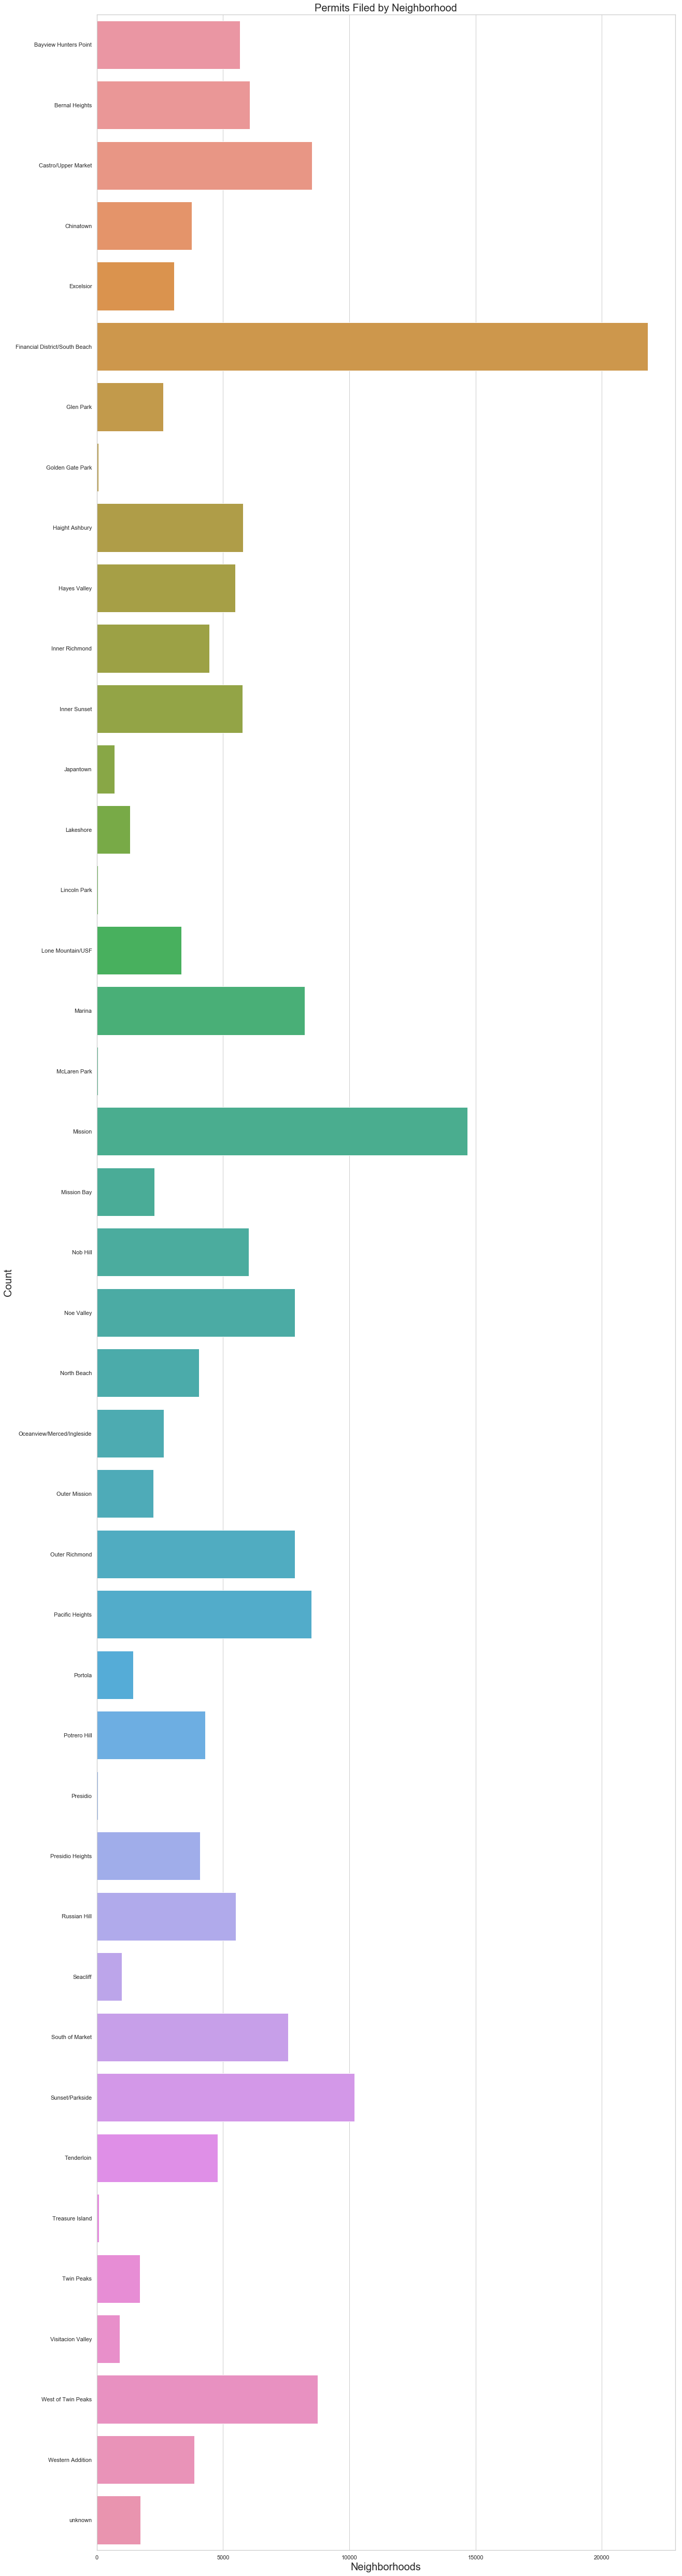

In [95]:
dic = dict(df.neighborhoods.value_counts(sort=False))
neighborhoods = list(dic.keys())
values = list(dic.values())

plt.figure(figsize=(20, 90))
_ = sb.barplot(x=values, y=neighborhoods, orient="h")
_ = plt.xlabel('Neighborhoods', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Neighborhood', fontsize=20)
plt.show()

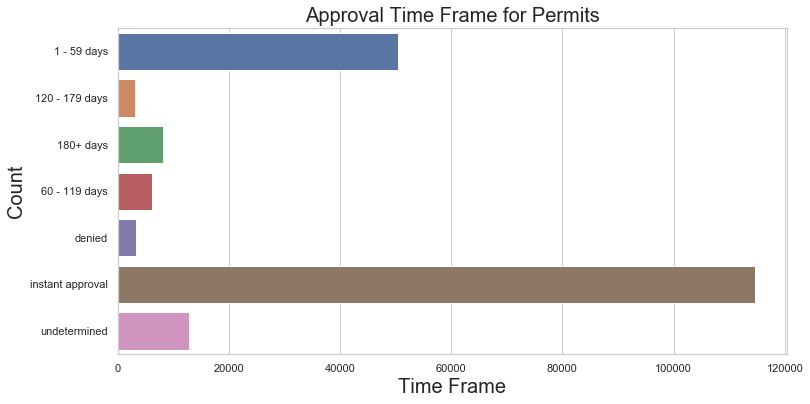

In [96]:
dic = dict(df.time_frame.value_counts(sort=False))
dic = dict(sorted(dic.items()))
tf = list(dic.keys())
values = list(dic.values())

plt.figure(figsize=(12, 6))
_ = sb.barplot(x=values, y=tf, orient="h")
_ = plt.xlabel('Time Frame', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Approval Time Frame for Permits', fontsize=20)
plt.show()

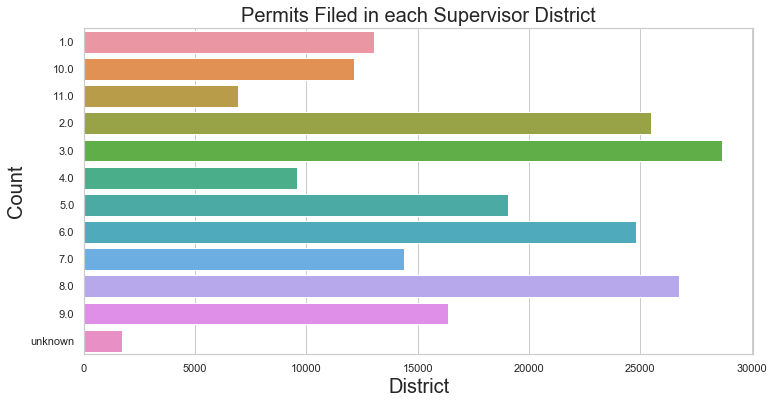

In [97]:
dic = dict(df.supervisor_district.value_counts(sort=False))
dic = dict(sorted(dic.items()))
district = list(dic.keys())
values = list(dic.values())

plt.figure(figsize=(12, 6))
_ = sb.barplot(x=values, y=district, orient="h")
_ = plt.xlabel('District', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed in each Supervisor District', fontsize=20)
plt.show()

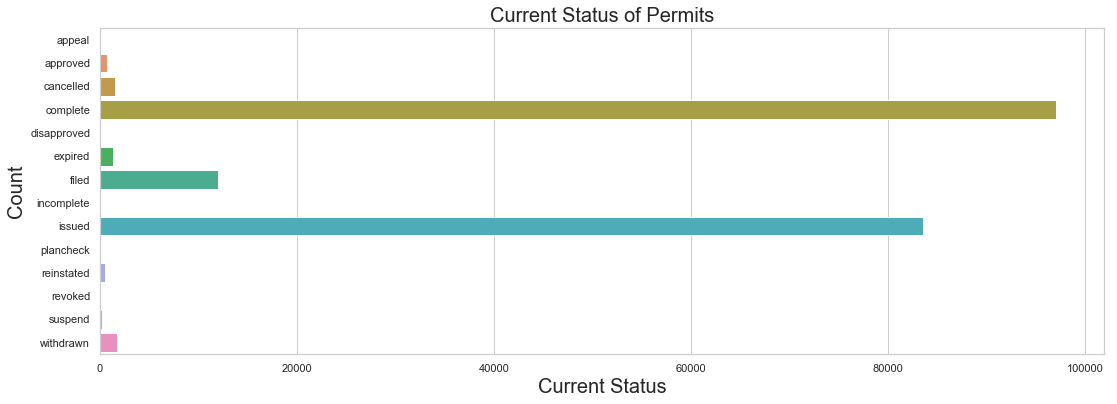

In [98]:
dic = dict(df.current_status.value_counts(sort=False))
category = list(dic.keys())
values = list(dic.values())

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=category, orient="h")
_ = plt.xlabel('Current Status', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Current Status of Permits', fontsize=20)
plt.show()

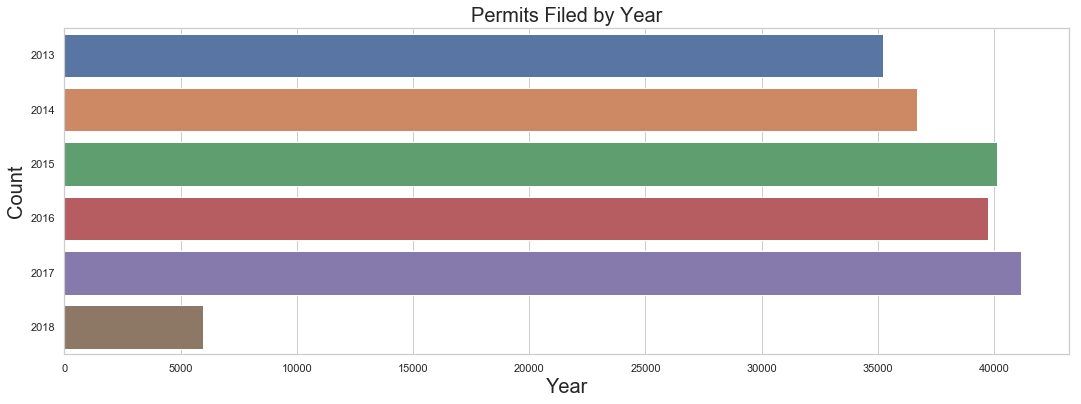

In [99]:
dic = dict(df.filed_date.dt.year.value_counts())
year = list(dic.keys())
values = list(dic.values())

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=year, orient="h")
_ = plt.xlabel('Year', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Year', fontsize=20)
plt.show()

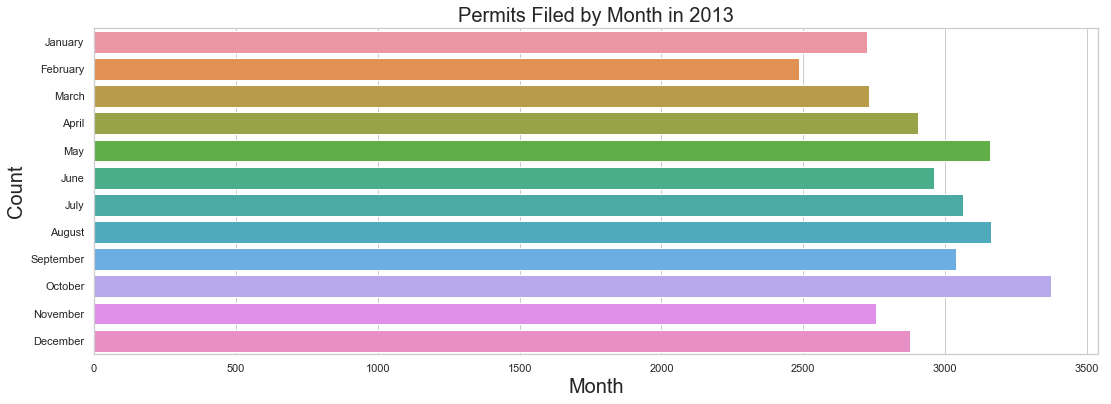

In [100]:
dic = dict(df[df.filed_date.dt.year == 2013].filed_date.dt.month.value_counts(sort=False))
month = list(dic.keys())
values = list(dic.values())
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=month, orient="h")
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Month in 2013', fontsize=20)
plt.show()

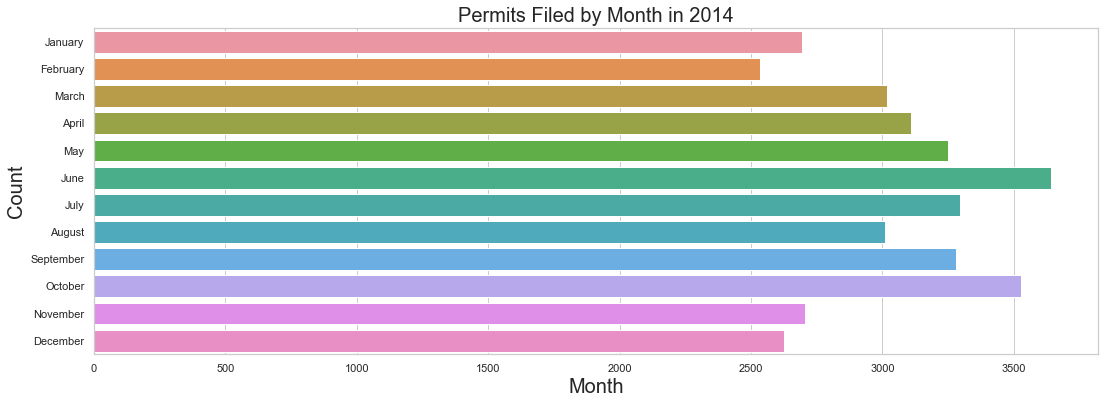

In [101]:
dic = dict(df[df.filed_date.dt.year == 2014].filed_date.dt.month.value_counts(sort=False))
month = list(dic.keys())
values = list(dic.values())
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=month, orient="h")
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Month in 2014', fontsize=20)
plt.show()

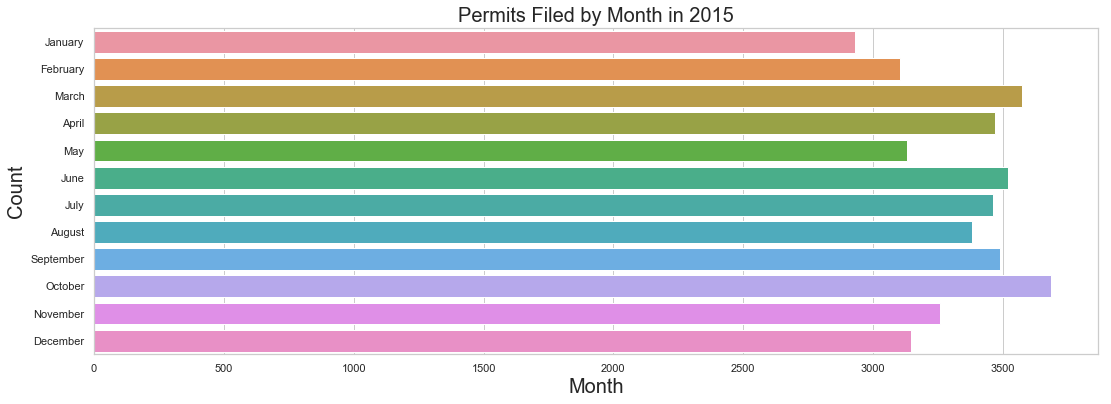

In [102]:
dic = dict(df[df.filed_date.dt.year == 2015].filed_date.dt.month.value_counts(sort=False))
month = list(dic.keys())
values = list(dic.values())
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=month, orient="h")
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Month in 2015', fontsize=20)
plt.show()

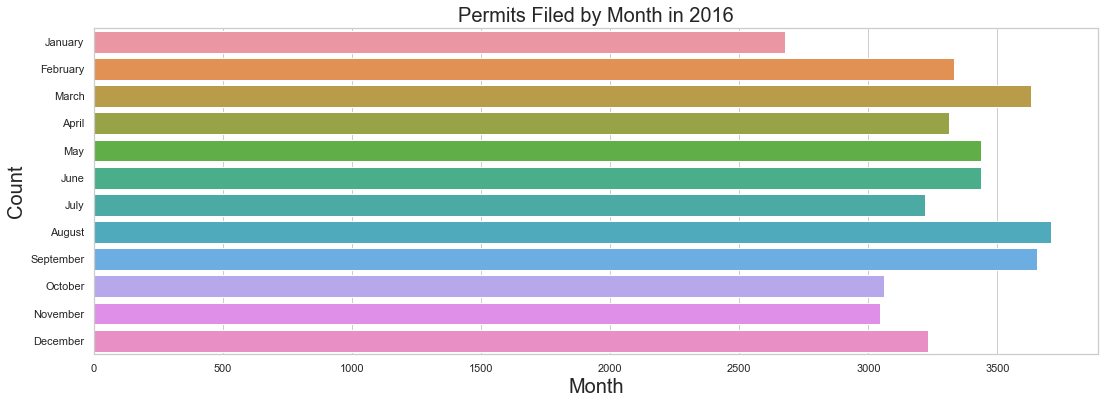

In [103]:
dic = dict(df[df.filed_date.dt.year == 2016].filed_date.dt.month.value_counts(sort=False))
month = list(dic.keys())
values = list(dic.values())
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=month, orient="h")
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Month in 2016', fontsize=20)
plt.show()

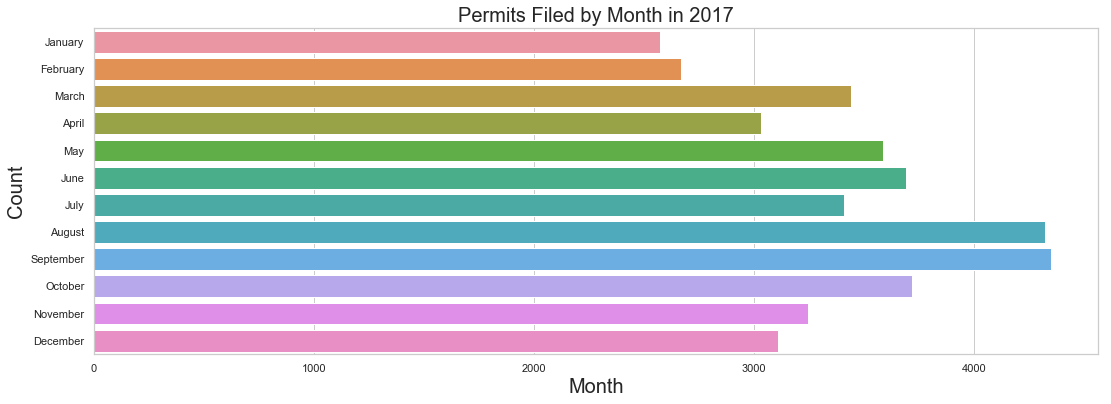

In [104]:
dic = dict(df[df.filed_date.dt.year == 2017].filed_date.dt.month.value_counts(sort=False))
month = list(dic.keys())
values = list(dic.values())
objects = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
           'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=month, orient="h")
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Month in 2017', fontsize=20)
plt.show()

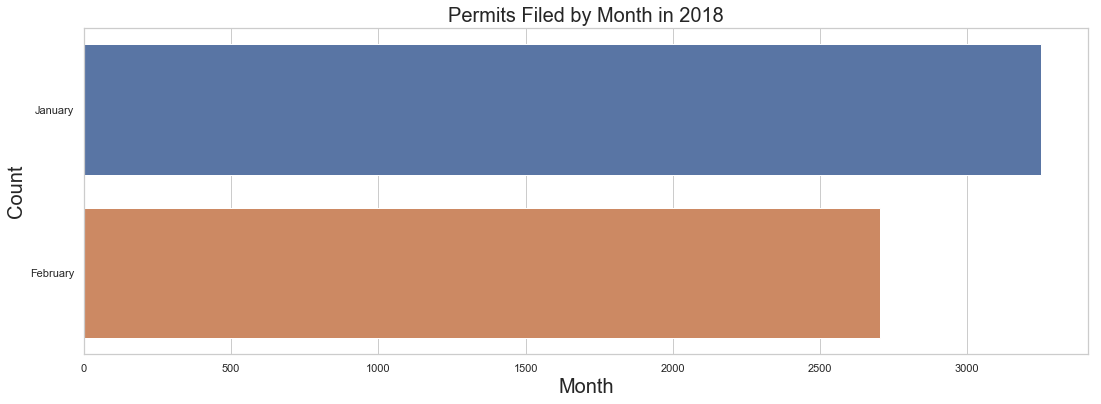

In [105]:
dic = dict(df[df.filed_date.dt.year == 2018].filed_date.dt.month.value_counts(sort=False))
month = list(dic.keys())
values = list(dic.values())
objects = ['January', 'February']

plt.figure(figsize=(18, 6))
_ = sb.barplot(x=values, y=month, orient="h")
x_pos = np.arange(len(objects))
_ = plt.yticks(x_pos, objects)
_ = plt.xlabel('Month', fontsize=20)
_ = plt.ylabel('Count', fontsize=20)
_ = plt.title('Permits Filed by Month in 2018', fontsize=20)
plt.show()

### Trends (e.g. high, low, increasing, decreasing, anomalies)